# 2019 Bay Wheels Ride Data Exploration
## by Odira Dancan


## Preliminary Wrangling
In this analysis, I wanted to look at the attributes that affect bike usage and thus could be used in making marketing decisions such as which customer demography to target.The main focus attributes are duration, age, weekday, user_type, bike_share_all_trips, member gender as they show specific user demographic.

## Dataset Overview

The data consisted of attributes of approximately 183412 observations in 16 variables. The key attributes included duration_sec, member_birth_year, user_type, bike_share_all_trips, and additional attributes I craeted from the dataset including, age, duration_min, day. Only important variables were considered and the unnecessary ones dropped.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
bike_df= pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# randomly sampling 10 rows
bike_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
149709,270,2019-02-06 18:59:37.0560,2019-02-06 19:04:07.9740,108.0,16th St Mission BART,37.764710,-122.419957,129.0,Harrison St at 20th St,37.758862,-122.412544,858,Subscriber,1994.0,Male,No
60560,857,2019-02-20 18:24:24.5800,2019-02-20 18:38:42.3180,22.0,Howard St at Beale St,37.789756,-122.394643,116.0,Mississippi St at 17th St,37.764802,-122.394771,4717,Subscriber,1970.0,Male,No
32395,676,2019-02-24 14:28:28.1680,2019-02-24 14:39:44.4850,131.0,22nd St at Dolores St,37.755000,-122.425728,73.0,Pierce St at Haight St,37.771793,-122.433708,6492,Subscriber,1988.0,Female,No
5640,1483,2019-02-28 12:19:14.7520,2019-02-28 12:43:57.8210,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5340,Customer,1962.0,Male,No
91479,336,2019-02-16 08:05:02.5980,2019-02-16 08:10:39.1700,317.0,San Salvador St at 9th St,37.333955,-121.877349,296.0,5th St at Virginia St,37.325998,-121.877120,6170,Subscriber,1995.0,Male,Yes
127436,1008,2019-02-10 15:40:28.7120,2019-02-10 15:57:17.0110,74.0,Laguna St at Hayes St,37.776435,-122.426244,377.0,Fell St at Stanyan St,37.771917,-122.453704,5554,Subscriber,1960.0,Male,No
120009,1276,2019-02-11 17:09:53.2850,2019-02-11 17:31:09.3200,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,16.0,Steuart St at Market St,37.794130,-122.394430,2663,Customer,1996.0,Male,No
66136,544,2019-02-20 08:56:30.6820,2019-02-20 09:05:34.6970,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,5142,Subscriber,1972.0,Male,No
29043,548,2019-02-25 07:58:17.8390,2019-02-25 08:07:26.0320,115.0,Jackson Playground,37.765026,-122.398773,81.0,Berry St at 4th St,37.775880,-122.393170,2722,Subscriber,1966.0,Female,No
113990,694,2019-02-12 10:14:05.6440,2019-02-12 10:25:40.3160,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,25.0,Howard St at 2nd St,37.787522,-122.397405,1830,Subscriber,1989.0,Male,No


In [5]:
# shape of the dataframe
bike_df.shape

(183412, 16)

In [6]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Handling missing values

In [8]:
#checking presence of missing values
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# dropping the missing values
bike_df.dropna(inplace=True)
bike_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# adding minutes column
bike_df['duration_min'] = bike_df['duration_sec']/60
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333


In [11]:
# creating column for age of customers

def get_date(date):
    '''Creating function to extract the year from the time '''
    birth_date = date.apply(lambda x : x.split(' ')[0])
    birth_date1 = birth_date.apply(lambda x : x.split('-')[0])
    return birth_date1

# birth_date = bike_df['start_time'].apply(lambda x : x.split(' ')[0])
bike_df['age'] = pd.to_numeric(get_date(bike_df['start_time'])) - pd.to_numeric(bike_df['member_birth_year'])
bike_df[:4]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0


In [12]:
# converting age to integer
bike_df['age'].astype('int').dtype

dtype('int32')

In [13]:
# changing the start_time and end_time to datetime type
bike_df['start_time'], bike_df['end_time'] = pd.to_datetime(bike_df['start_time']), pd.to_datetime(bike_df['end_time'])
bike_df['day'] = bike_df['start_time'].dt.day_name()
bike_df['month'] = bike_df['start_time'].dt.month_name()
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,day,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,30.0,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,60.0,Thursday,February


In [14]:

bike_df['start_time'].describe()

count                         174952
unique                        174941
top       2019-02-11 17:05:07.840000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

In [16]:
# dropping unwanted columns

target_cols = ['duration_min', 'start_time', 'end_time', 'day','month', 'age',
   'user_type',
   'member_gender', 'bike_share_for_all_trip']
target_df = bike_df[target_cols]
target_df.head()

,duration_min,start_time,end_time,day,month,age,user_type,member_gender,bike_share_for_all_trip
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Thursday,February,35.0,Customer,Male,No
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Thursday,February,47.0,Customer,Male,No
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Thursday,February,30.0,Subscriber,Other,No
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Thursday,February,45.0,Subscriber,Male,Yes
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,Thursday,February,60.0,Subscriber,Male,No


In [23]:
cat = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#day = CategoricalDtype(categories=cat, ordered=True)
target_df['day'] = pd.Categorical(target_df['day'], categories = cat, ordered=True)

In [24]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   day                      174952 non-null  category      
 4   month                    174952 non-null  object        
 5   age                      174952 non-null  float64       
 6   user_type                174952 non-null  object        
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(2), object(4)
memory usage: 12.2+ MB


In [25]:
target_df.describe()

,duration_min,age
count,174952.000000,174952.000000
mean,11.733379,34.196865
std,27.370082,10.118731
min,1.016667,18.000000
25%,5.383333,27.000000
50%,8.500000,32.000000
75%,13.150000,39.000000
max,1409.133333,141.000000


### What is the structure of your dataset?

> The dataset has 183412 observations with 16 columns

### What is/are the main feature(s) of interest in your dataset?

> duration_sec, start_time, end_time,
  start_station_name, bike_id, user_type,
  member_birth_year, member_gender,bike_share_for_all_trip, end_station_name

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, start_time, end_time,
  start_station_name, bike_id, user_type,
  member_birth_year, member_gender,bike_share_for_all_trip, end_station_name

## Visual Analysis of the Dataset

## 1: Univariate Visualization

### plot 1a: Which user type reports the highest bike usage?

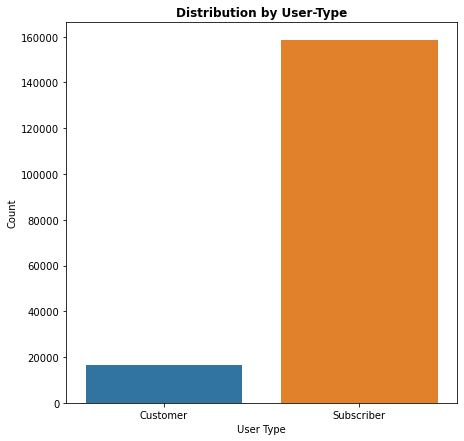

In [26]:
# User type distribution
plt.figure(figsize=(7,7))
sns.countplot(target_df['user_type'])
plt.title('Distribution by User-Type', fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


### Observations:
- Subscribers account for more than the casual customers. There is a big differnce in the number of customers and the subscribers

### plot 1b: Which gender uses the bike mostly?

Text(0.5, 0, 'User Types')

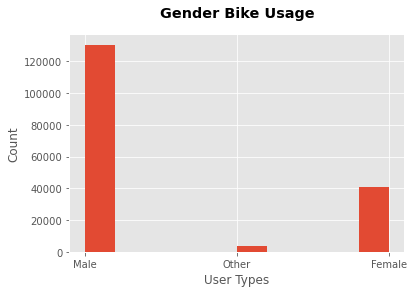

In [27]:
# gender distribution
plt.style.use('ggplot')
plt.hist(target_df['member_gender'])
plt.title('Gender Bike Usage', y = 1.05, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('User Types')

#### Observations
- males recorded the highest number of users followed by females then the other gender

### plot 1d: what is the distribution of the  bike share for all trips?



Text(0, 0.5, 'Count')

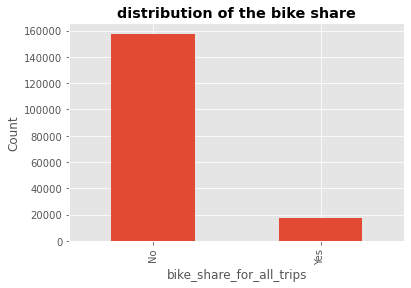

In [28]:
target_df['bike_share_for_all_trip'].value_counts().plot.bar()
plt.title('distribution of the bike share', fontweight='bold')
plt.xlabel('bike_share_for_all_trips')
plt.ylabel('Count')

### Observation:
- Number of users who did not want to share bike for all the trips is significantly higher than the number of those who wanted to share the bike

### plot 1e: What is the common age range among the users?

Text(0.5,0,'Age (years)')

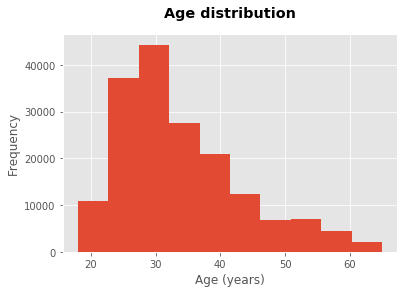

In [15]:
# removing outliers in age
target_df.age = pd.to_numeric(target_df.age)
target_df = target_df.query('age <= 65')
target_df.age.plot.hist()
plt.title('Age distribution', y=1.05, fontweight='bold')
plt.xlabel('Age (years)')

### Observations
- Most users tend to be between 25-40

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Weekdays usually busier than weekends, maybe because people rest, attend to their religious belief. Thursdays and Tuesdays usually the busiest days of the week. Summar time was the most popular season of a year, likely due to the weather.

> On user types, there were more male riders than female, and most members were subscribers compared to non-subscribers(customers). Most users did not want to share bikes for all their trips. Most users are aged 20 to 40 years.

> Duration taken by users were short, most lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

> Little transformation was needed for the dataset, like including new columns(age, weekdays, time in minutes).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the age was a little surprising at first plotting out the original data. I used .describe() to get an overview of the max, mean. median ages. there seemed to be outliers in the age as from the age of 65. In order to focus on the important part of the age, I queried the data with age range of 65 and below and plotted an histogram.

## 2: Bivariate Exploration

### plot 2a: Which age range uses the bikes frequently?

Text(0.5,6.8,'Age (years)')

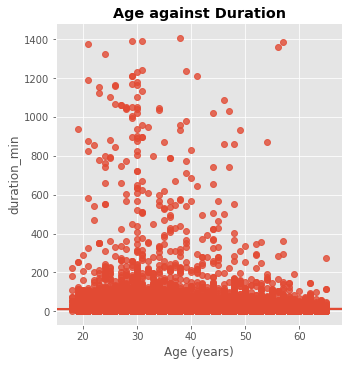

In [16]:
fig = plt.figure()
sns.lmplot(x = 'age', y = 'duration_min', data = target_df)
plt.title('Age against Duration', fontweight='bold')
plt.ylabel('duration_min')
plt.xlabel('Age (years)')

### Observation:
- There seems to be higher concentration of users aged between 20 to 45 who used the bike for a longer duration of time as well

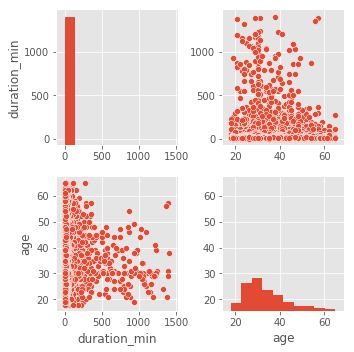

In [28]:
sns.pairplot(target_df)

### Observation:
- Genarally, the dataframe is non-linear across all the variables

### plot 2b: Which gender recorded highest duration usage?

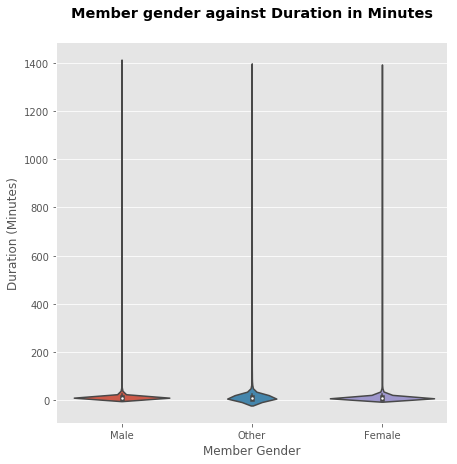

In [18]:
plt.figure(figsize=(7,7))
sns.violinplot(x='member_gender', y='duration_min', data=target_df)
plt.title('Member gender against Duration in Minutes', y=1.05, fontweight='bold')
plt.xlabel('Member Gender')
plt.ylabel('Duration (Minutes)')
plt.legend(loc='best')

### Observation:
- Other gender has higher median duration minutes compared to females and males

### plot 2c: Which user type is the youngest

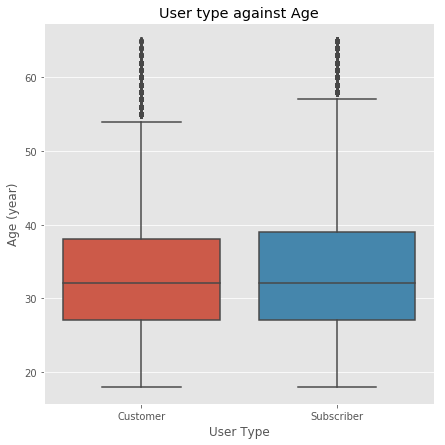

In [20]:
plt.figure(figsize=(7,7))
sns.boxplot(x='user_type', y='age', data=target_df)
plt.title('User type against Age')
plt.ylabel('Age (year)')
plt.xlabel('User Type')
plt.legend()

### Observation:
- There doesnt seem to be a big difference in age amongst the customer and subscriber users. They are almost the same even though the subscriber seems to have a higher median age

### plot 2d: How does the user types compare in ride duration?

Text(0.5,0,'User Type')

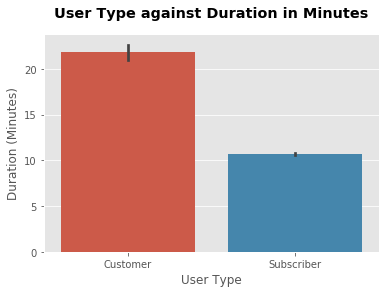

In [21]:
sns.barplot(x = 'user_type', y = 'duration_min', data = target_df)
plt.title('User Type against Duration in Minutes', y=1.05, fontweight='bold')
plt.ylabel('Duration (Minutes)')
plt.xlabel('User Type')

### Observation:
- Customers used the bikes for more minutes than the subscribers with a differences of approximately 13 minutes

In [32]:
# checking average, maximum and minimum minutes taken
target_df['duration_min'].agg(['mean', 'max', 'min'])

mean      11.731410
max     1409.133333
min        1.016667
Name: duration_min, dtype: float64

### plot 2e: How does the user type compare in age?

Text(0.5,0,'User Type')

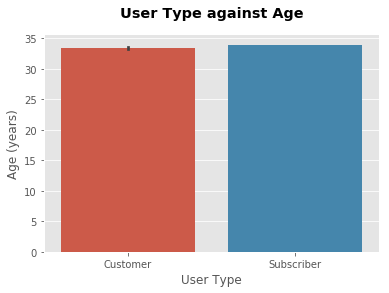

In [22]:
sns.barplot(x = 'user_type', y = 'age', data = target_df)
plt.title('User Type against Age', y=1.05, fontweight='bold')
plt.ylabel('Age (years)')
plt.xlabel('User Type')

### Observation:
- The age difference between the customer and subscriber user types is very small even though subscribers' age appears to be higher than customers

### plot 2f: which gender uses the bike frequently?

Text(0.5,0,'Member Gender')

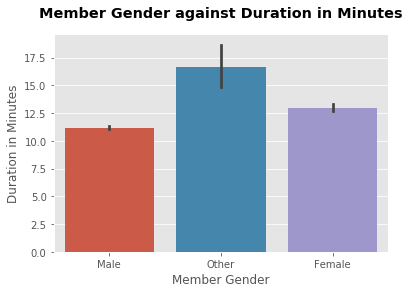

In [34]:
sns.barplot(x = 'member_gender', y = 'duration_min', data = target_df)
plt.title('Member Gender against Duration in Minutes', y=1.05, fontweight='bold')
plt.ylabel('Duration in Minutes')
plt.xlabel('Member Gender')

### Observtion 
- The 'Other' gender recorded longest duration compared to female and male while males recorded the least duration

### plot 2g: Which gender is youngest?

Text(0.5,0,'Member Gender')

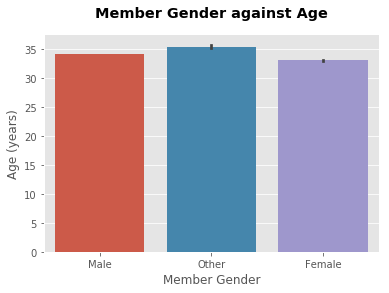

In [23]:
sns.barplot(x = 'member_gender', y = 'age', data = target_df)
plt.title('Member Gender against Age', y=1.05, fontweight='bold')
plt.ylabel('Age (years)')
plt.xlabel('Member Gender')

### Observation:
- The 'Other' gender appears to carry a slightly older users compared to females and males. Females tends to have the youngest users even though all the genders appears to be within 33- 37 years old.

### plot 2h: Which days of the week has longer duration of bike usage?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

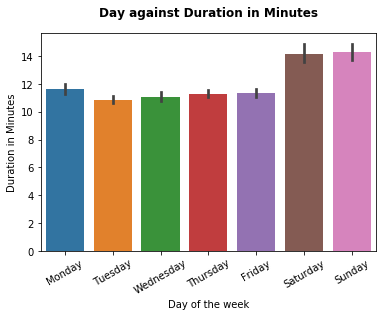

In [27]:
sns.barplot(x = 'day', y = 'duration_min', data = target_df)
plt.title('Day against Duration in Minutes', y=1.05, fontweight='bold')
plt.ylabel('Duration in Minutes')
plt.xlabel('Day of the week')
plt.xticks(rotation=30)

### Observation:
- More minutes are recorded during the weekends compared to the weekdays. The minutes taken during the weeks looks to be in the range of 10-12 minutes while weekends are above 14 minutes.

### plot 2i: Which user uses the bike mostly and on which day?

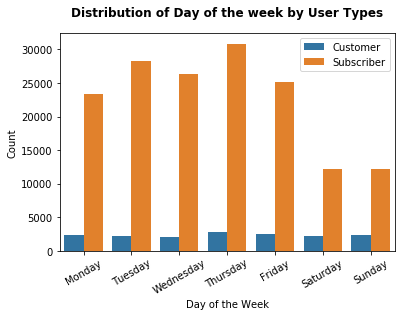

In [28]:

sns.countplot(data = target_df, x = 'day', hue = 'user_type')
plt.xticks(rotation=30)
plt.title('Distribution of Day of the week by User Types', y=1.05, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.legend(loc='best')

### Observation:
- Subscribers recorded the highest usage across the week compared to non-subscribers.
- Weekdays recorded highest number of bike usage compared to weekends(Saturday, Sunday)
- Thursdays and Tuesdays recorded the highest number of users while Saturday, Sunday recorded the least


### plot 2j: Which gender uses the bikes most during the week?

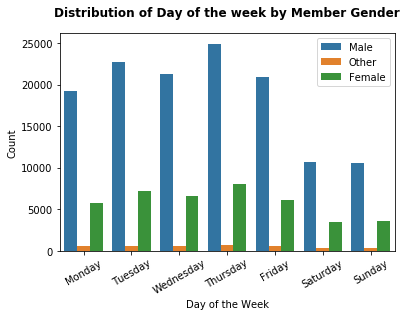

In [29]:
sns.countplot(data = target_df, x = 'day', hue = 'member_gender')
plt.xticks(rotation=30)
plt.title('Distribution of Day of the week by Member Gender', y=1.05, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.legend(loc='best')

### Observation:
- There are more males than females and other gender using bikes across the week.
- The other records the least bike usage across the week followed by the females.
- Bike usage is generally high during the weekdays than weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Other gender recorded longest duration compared to female and male while males recorded the least duration. Bike usage is higher during the week than during weekends. More males use bikes during the week than any females and other gender. Subscribers record higher bike usage across the week than customers. Thursdays and Tuesdays are the busiest days of the week. Other gender seem to have much older users that females and males. Females tends to be the youngest users. Average subscriber age is slightly higher than customer age. Other gender recorded highest duration usage compared to females and males across the week.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that males reports least duration usage across the weeks while they also make up the most users. Ironically, subscribers record the longest duration usage while also make up the oldest user component.

## 3: Multivariate Exploration

### plot 3a: What is the distribution of Age against Duration by User Types

Text(38.6665,0.5,'Duration (Minutes)')

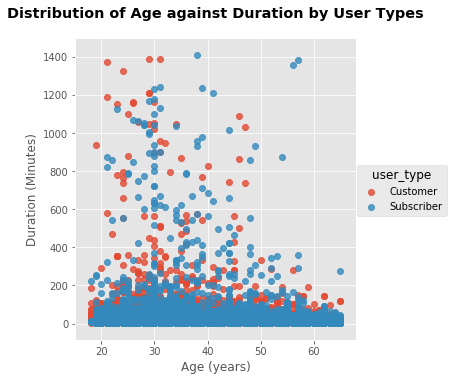

In [27]:
sns.lmplot(data = target_df, x = 'age', y = 'duration_min', hue = 'user_type', fit_reg=False)
plt.title('Distribution of Age against Duration by User Types', y=1.05, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Duration (Minutes)')

### Observation:
- Generally, both customers and subscribers are concentrated in the age range of 20 to 45 with also the longest duration 

### plot 3b: How does the average duration compare across the week amongst the user types?

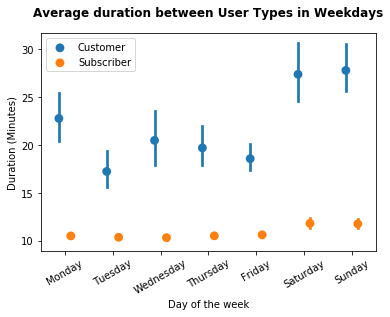

In [15]:
sns.pointplot(data = target_df, x = 'day', y = 'duration_min', hue = 'user_type', linestyles="", dodge = 0.25)
plt.title('Average duration between User Types in Weekdays', y = 1.05, fontweight = 'bold')
plt.ylabel('Duration (Minutes)')
plt.xlabel('Day of the week')
plt.xticks(rotation=30)
plt.legend(loc='best')

### Observations:
- Customers(non-subscribers) recorded longer duration usage across the week compared to subscribers
- Subscribers recorded highest duration usage on weekends. 
- 

### plot 3c: Which age of users were more inclined to offering bike share for all trips?

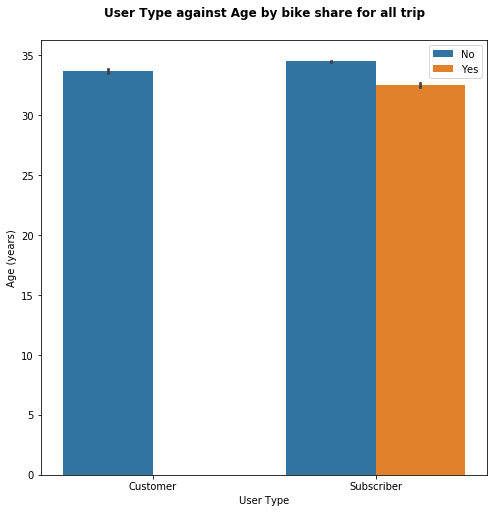

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(data = target_df, x = 'user_type', y='age', hue='bike_share_for_all_trip')
plt.title('User Type against Age by bike share for all trip', y=1.04, fontweight='bold')
plt.ylabel('Age (years)')
plt.xlabel('User Type')
plt.legend(loc='best')


### Observation:
- The number of users who did not want to share bike all round the trips are more than those who wanted to share.
- All Customers did not want to share bike all round the trips
- The number of subscribers who did not want to share bike is higher than those who wanted to share their bikes in all trips
- The age range for most user types is between 20 - 40 years old.

### plot 3d: Which user by gender recorded highest usage duration?

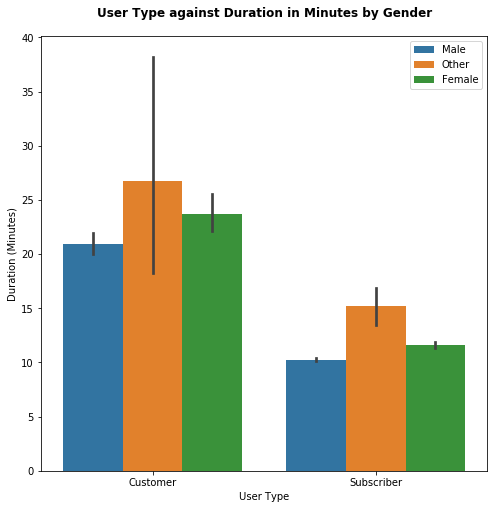

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(data = target_df, x = 'user_type', y='duration_min', hue='member_gender')
plt.title('User Type against Duration in Minutes by Gender', y=1.03, fontweight='bold')
plt.ylabel('Duration (Minutes)')
plt.xlabel('User Type')
plt.legend(loc='best')

### Observation:
- Other gender customers and subscribers recorded the highest duration usage while males recorded the least.
- Generally, customers recorded longer duration more than the subscribers across all genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate analysis strengthened some of the patterns unearthed in the univariate and bivariate analysis. The shorter duration usage for subscribers may imply higher use for work when they're going to work suggesting they might be using the bikes mainly for work communitng. The subscribers also seems to be open to sharing, perhaps to reduce cost.


### Were there any interesting or surprising interactions between features?

> Most of the relationships makes sense especially after doing both univariate and bivariate plottings. Therefore, I did not observe any significant surprise from the multivariate exploration.


## Conclusions
>- Weekdays usually busier than weekends, maybe because people rest, attend to their religious belief. Thursdays and Tuesdays usually the busiest days of the week. Summar time was the most popular season of a year, likely due to the weather.
>- On user types, there were more male riders than female, and most members were subscribers compared to non-subscribers(customers). Most users did not want to share bikes for all their trips. Most users are aged 20 to 40 years.
>- Duration taken by users were short, most lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.
>- The Other gender recorded longest duration compared to female and male while males recorded the least duration. Bike usage is higher during the week than during weekends. More males use bikes during the week than any females and other gender. Subscribers record higher bike usage across the week than customers. Thursdays and Tuesdays are the busiest days of the week. Other gender seem to have much older users that females and males. Females tends to be the youngest users. Average subscriber age is slightly higher than customer age. Other gender recorded highest duration usage compared to females and males across the week.
>- The shorter duration usage for subscribers may imply higher use for work when they're going to work suggesting they might be using the bikes mainly for work communitng. The subscribers also seems to be open to sharing, perhaps to reduce cost.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 428579 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/